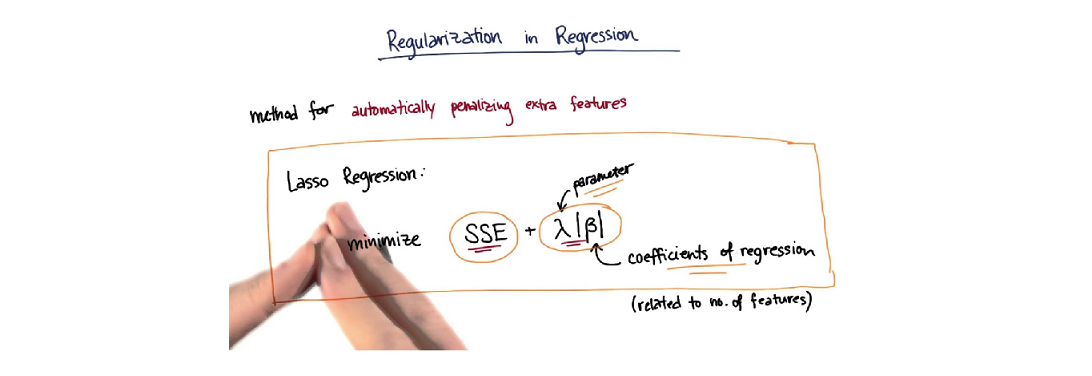

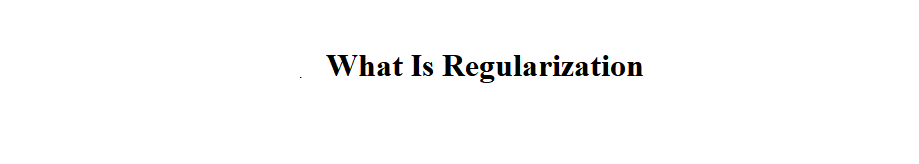

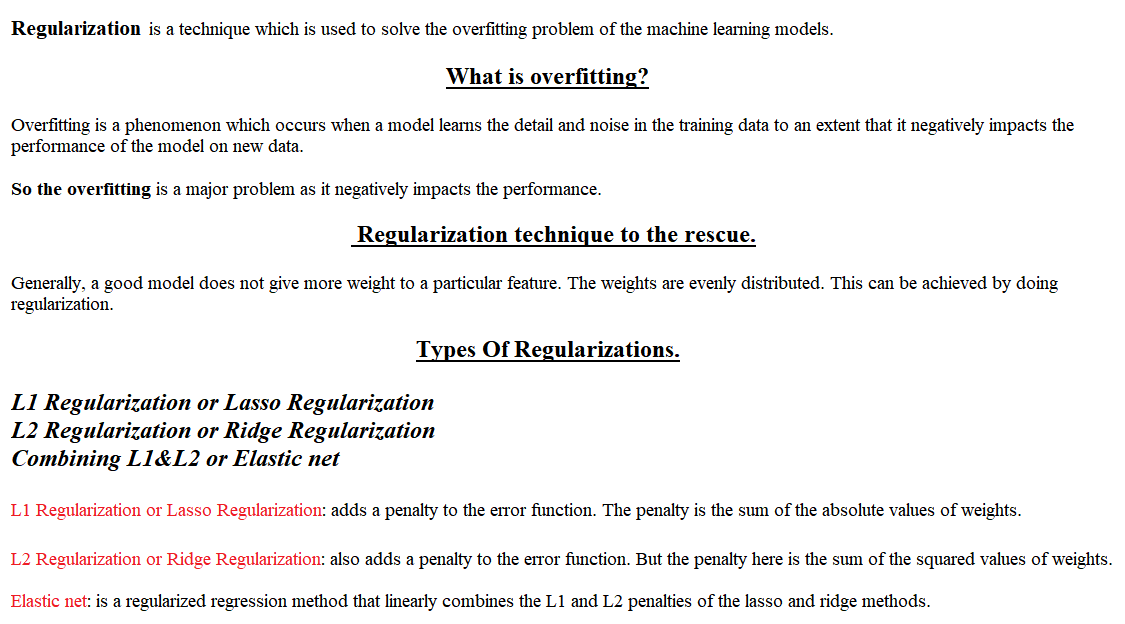

# Import libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Import Data

In [ ]:
df=pd.read_csv('/kaggle/input/real-estate-price-prediction/Real estate.csv')

# Data Overview

In [ ]:
df.head()

In [ ]:
df.tail()

In [ ]:
df.describe()

In [ ]:
df.info()

In [ ]:
df.shape

In [ ]:
df.corr()

# Exploratory Data Analysis

In [ ]:
plt.figure(figsize=(12,5))
sns.displot(x=df['Y house price of unit area'], kde=True, aspect=2, color='green')
plt.xlabel('House Price ')

In [ ]:
ax = sns.heatmap(df.corr(),annot=True,linewidths=.7,cmap='coolwarm')

In [ ]:
sns.pairplot(df)

#  Determine Features and Label

In [ ]:
X= df.drop('Y house price of unit area', axis=1)
y=df['Y house price of unit area']

In [ ]:
X.shape,y.shape

# Preprocessing

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
polynomial_converter= PolynomialFeatures(degree=3, include_bias=False)
poly_features= polynomial_converter.fit_transform(X)
poly_features.shape

# Split Data to Train and Test

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(poly_features, y, test_size=0.3, random_state=101)

# Scalling DATA

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()
scaler.fit(X_train)

In [ ]:
X_train= scaler.transform(X_train)
X_test= scaler.transform(X_test)

X_train,y_train,X_test,y_test

# Regularization

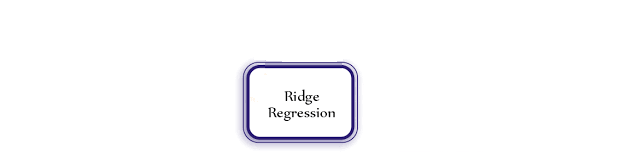

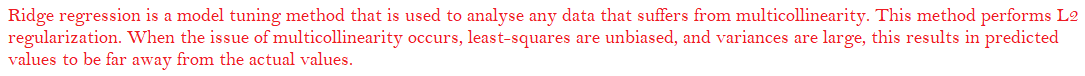

In [ ]:
from sklearn.linear_model import Ridge
ridge_model= Ridge(alpha=10)
ridge_model.fit(X_train, y_train)

In [ ]:
y_pred= ridge_model.predict(X_test)

# Model Evaluation

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

MAE= mean_absolute_error(y_test, y_pred)
MSE= mean_squared_error(y_test, y_pred)
RMSE= np.sqrt(MSE)

# Metrics

# Ridge Regression_Alpha value with Cross-validation

In [ ]:
from sklearn.linear_model import RidgeCV
ridge_cv_model=RidgeCV(alphas=(0.1, 1.0, 10.0), scoring='neg_mean_absolute_error')
ridge_cv_model.fit(X_train, y_train)


In [ ]:
ridge_cv_model.alpha_

In [ ]:
y_pred_ridge= ridge_cv_model.predict(X_test)

# Metrics

In [ ]:
MAE_ridge= mean_absolute_error(y_test, y_pred_ridge)
MSE_ridge= mean_squared_error(y_test, y_pred_ridge)
RMSE_ridge= np.sqrt(MSE_ridge)

In [ ]:
pd.DataFrame([MAE_ridge, MSE_ridge, RMSE_ridge], index=['MAE', 'MSE', 'RMSE'], columns=['Ridge Metrics'])

In [ ]:
ridge_cv_model.coef_

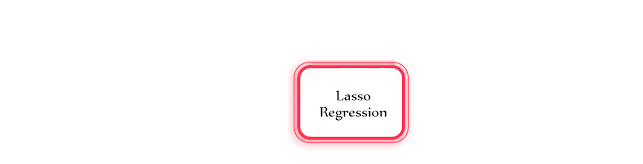

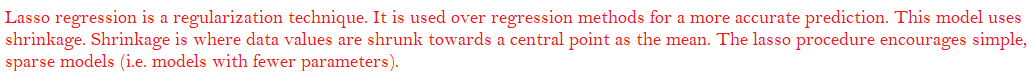

In [ ]:
from sklearn.linear_model import LassoCV
lasso_cv_model= LassoCV(eps=0.01, n_alphas=100, cv=5)
lasso_cv_model.fit(X_train, y_train)


In [ ]:
lasso_cv_model.alpha_

In [ ]:
y_pred_lasso= lasso_cv_model.predict(X_test)

# Metrics

In [ ]:
MAE_Lasso= mean_absolute_error(y_test, y_pred_lasso)
MSE_Lasso= mean_squared_error(y_test, y_pred_lasso)
RMSE_Lasso= np.sqrt(MSE_Lasso)

In [ ]:
pd.DataFrame([MAE_Lasso, MSE_Lasso, RMSE_Lasso], index=['MAE', 'MSE', 'RMSE'], columns=['Lasso Metrics'])

In [ ]:
lasso_cv_model.coef_

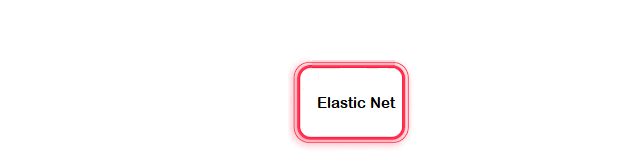

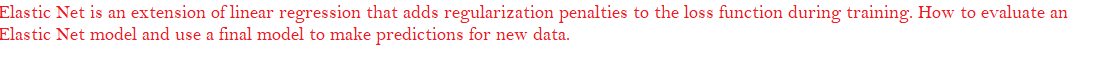

In [ ]:
from sklearn.linear_model import ElasticNetCV
elastic_model= ElasticNetCV(l1_ratio=[0.1, 0.5, 0.7, 0.9, 0.95, 0.99, 1],cv=5, max_iter=150000)
elastic_model.fit(X_train, y_train)


In [ ]:
elastic_model.l1_ratio_

In [ ]:
y_pred_elastic=elastic_model.predict(X_test)

# Metrics

In [ ]:
MAE_Elastic= mean_absolute_error(y_test, y_pred_elastic)
MSE_Elastic= mean_squared_error(y_test, y_pred_elastic)
RMSE_Elastic= np.sqrt(MSE_Elastic)

In [ ]:
pd.DataFrame([MAE_Elastic, MSE_Elastic, RMSE_Elastic], index=['MAE', 'MSE', 'RMSE'], columns=['Elastic Metrics'])

In [ ]:
elastic_model.coef_